In [1]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from numpy.linalg import eig #eigenvector decomposition

#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots
from matplotlib import pyplot #barplot

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

# Define parameters

In [3]:
#should be consistent across all notebooks
#ADD YOUR PATH TO SAVE OUTPUT (e.g.: 'G:\\VPHI\\Welfare\\2- Research Projects\\OFHE2.OriginsE2\\DataOutput\\')
path_extracted_data = 'TO ADD'
#ADD A NAME in case you want multiple run with all output saved each time
saving_name = 'TO ADD'
#choose better naming of behaviour (different names from the behavioural syndrome csv file than repeatbatility, so that 4 of the 
#behaviours have to be defined two times
dico_mvt_name = {'scalefoodsameDurTimingr50final':'fresh food experience index',
                 'scaleverticaltraveldistancefulllightperinsideh':'vertical travelled distance',
                 'midcumZ4hMorning':'mid-nestbox zone usage',
                 'SleepingUppest':'has slept on top tier',
                 'WentinWG':'has been outside',
                'food_sameDurTiming_r50_final':'fresh food experience index',
                'Sleeping_Uppest':'has slept on top tier',
                'vertical_travel_distance_fulllight_perinsideh':'vertical travelled distance',
                'mid_cum_Z4_h_Morning':'mid-nestbox zone usage'}

In [4]:
#TO DELETE WHEN SENDING TO PUBLICATION
path_extracted_data = config.path_extracted_data
saving_name = 'ALLOBS'

# Behavioural syndrome

### Download mean and CI estimates

In [5]:
df_IC = pd.read_csv(os.path.join(path_extracted_data,saving_name+'_df_CI_BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_IC.shape) 
display(df_IC.head(3))

df_mean = pd.read_csv(os.path.join(path_extracted_data,saving_name+'_df_mean_BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_mean.shape) 
display(df_mean.head(3))

#merge both estimates and the CI
df = pd.merge(df_mean, df_IC, on=['Unnamed: 0'], how='outer')
df.rename(columns={'Unnamed: 0':'parameter','x':'value_mean'}, inplace=True)
df['text'] = df.apply(lambda x: "%.2f" % round(x['value_mean'],2)+' ['+"%.2f" % round(x['lower'],2)+', '+"%.2f" % round(x['upper'],2)+']', 
                          axis=1)
#separate parameters family (random effect, fexed effect, sigma, correlatiom)
display(list(df['parameter'].unique()))
df['type'] = df['parameter'].map(lambda x: x.split('_')[0])
display(df['type'].value_counts())

#henID intercept random intercept
df['HenID'] = df['parameter'].map(lambda x: x.split(',')[0].split('[')[-1] if 'hen_' in x else None)
#else None, otherwise will utput the entire name (i.e. x)
print(df['HenID'].unique())

#mvt variable for the hen intercepts to be visualised
df['mvtvariable'] = df['parameter'].map(lambda x: x.split('r_HenID__')[-1].split('[')[0] if ('r_HenID__' in x) \
                                        & ('cor_HenID' not in x) else None)
li_mvt = [i for i in df['mvtvariable'].unique() if i!=None]
print(li_mvt)
print('------------------all dataframe')
print(df.shape) 
display(df.head(3))

#correlations dataframe
df_cor_summarized = df[df['type']=='cor'].copy()
for mvt in li_mvt:
    df_cor_summarized[mvt] = df_cor_summarized['parameter'].map(lambda x: mvt in x)
print('------------------correlations dataframe')
display(df_cor_summarized)

#sd dataframe
df_sd_summarized = df[df['type']=='sd'].copy()
df_sd_summarized['parameter'] = df_sd_summarized['parameter'].map(lambda x: x.split('sd_HenID__')[-1])
print('------------------sd dataframe')
display(df_sd_summarized)

(1026, 3)


,Unnamed: 0,lower,upper
0,b_scalefoodsameDurTimingr50final_Intercept,-0.064798,0.300854
1,b_scaleverticaltraveldistancefulllightperinsid...,-0.197497,0.181067
2,b_midcumZ4hMorning_Intercept,1.456759,1.520648


(1026, 2)


,Unnamed: 0,x
0,b_scalefoodsameDurTimingr50final_Intercept,0.113984
1,b_scaleverticaltraveldistancefulllightperinsid...,-0.013670
2,b_midcumZ4hMorning_Intercept,1.487247


['b_scalefoodsameDurTimingr50final_Intercept',
 'b_scaleverticaltraveldistancefulllightperinsideh_Intercept',
 'b_midcumZ4hMorning_Intercept',
 'b_SleepingUppest_Intercept',
 'b_WentinWG_Intercept',
 'b_scalefoodsameDurTimingr50final_TreatmentOFH',
 'b_scalefoodsameDurTimingr50final_FoodPenIDFoodPenID5M8',
 'b_scalefoodsameDurTimingr50final_FoodPenIDFoodPenID9M12',
 'b_scalefoodsameDurTimingr50final_scaleweightInterp',
 'b_scalefoodsameDurTimingr50final_scaleKBFInterp',
 'b_scalefoodsameDurTimingr50final_scaleDIB',
 'b_scalefoodsameDurTimingr50final_CLASSLEXP',
 'b_scalefoodsameDurTimingr50final_CLASSMEXP',
 'b_scaleverticaltraveldistancefulllightperinsideh_TreatmentOFH',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleweightInterp',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleKBFInterp',
 'b_scaleverticaltraveldistancefulllightperinsideh_scaleDIB',
 'b_scaleverticaltraveldistancefulllightperinsideh_CLASSLEXP',
 'b_scaleverticaltraveldistancefulllightperinsideh_CLAS

r        970
b         37
cor       10
sd         5
sigma      2
shape      1
lp         1
Name: type, dtype: int64

[None 'hen_1' 'hen_10' 'hen_101' 'hen_102' 'hen_105' 'hen_106' 'hen_107'
 'hen_108' 'hen_109' 'hen_111' 'hen_112' 'hen_113' 'hen_115' 'hen_116'
 'hen_118' 'hen_119' 'hen_12' 'hen_120' 'hen_122' 'hen_123' 'hen_124'
 'hen_126' 'hen_127' 'hen_128' 'hen_13' 'hen_131' 'hen_133' 'hen_134'
 'hen_135' 'hen_136' 'hen_137' 'hen_138' 'hen_139' 'hen_14' 'hen_140'
 'hen_141' 'hen_142' 'hen_143' 'hen_144' 'hen_145' 'hen_146' 'hen_147'
 'hen_149' 'hen_15' 'hen_150' 'hen_151' 'hen_152' 'hen_153' 'hen_154'
 'hen_155' 'hen_156' 'hen_158' 'hen_159' 'hen_163' 'hen_164' 'hen_165'
 'hen_166' 'hen_167' 'hen_168' 'hen_169' 'hen_17' 'hen_170' 'hen_171'
 'hen_172' 'hen_173' 'hen_174' 'hen_175' 'hen_177' 'hen_18' 'hen_180'
 'hen_181' 'hen_182' 'hen_183' 'hen_184' 'hen_185' 'hen_186' 'hen_187'
 'hen_188' 'hen_189' 'hen_19' 'hen_190' 'hen_191' 'hen_192' 'hen_193'
 'hen_194' 'hen_195' 'hen_196' 'hen_197' 'hen_198' 'hen_199' 'hen_2'
 'hen_20' 'hen_200' 'hen_201' 'hen_202' 'hen_203' 'hen_204' 'hen_205'
 'hen_206' 'he

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
0,b_scalefoodsameDurTimingr50final_Intercept,0.113984,-0.064798,0.300854,"0.11 [-0.06, 0.30]",b,None,None
1,b_scaleverticaltraveldistancefulllightperinsid...,-0.013670,-0.197497,0.181067,"-0.01 [-0.20, 0.18]",b,None,None
2,b_midcumZ4hMorning_Intercept,1.487247,1.456759,1.520648,"1.49 [1.46, 1.52]",b,None,None


------------------correlations dataframe


,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingUppest,WentinWG
42,cor_HenID__scalefoodsameDurTimingr50final_Inte...,0.466077,0.348321,0.592172,"0.47 [0.35, 0.59]",cor,None,None,True,True,False,False,False
43,cor_HenID__scalefoodsameDurTimingr50final_Inte...,-0.082449,-0.236499,0.069314,"-0.08 [-0.24, 0.07]",cor,None,None,True,False,True,False,False
44,cor_HenID__scaleverticaltraveldistancefullligh...,-0.022486,-0.175245,0.119477,"-0.02 [-0.18, 0.12]",cor,None,None,False,True,True,False,False
45,cor_HenID__scalefoodsameDurTimingr50final_Inte...,-0.209279,-0.362715,-0.053929,"-0.21 [-0.36, -0.05]",cor,None,None,True,False,False,True,False
46,cor_HenID__scaleverticaltraveldistancefullligh...,-0.229544,-0.387820,-0.082061,"-0.23 [-0.39, -0.08]",cor,None,None,False,True,False,True,False
47,cor_HenID__midcumZ4hMorning_Intercept__Sleepin...,-0.037200,-0.196273,0.114593,"-0.04 [-0.20, 0.11]",cor,None,None,False,False,True,True,False
48,cor_HenID__scalefoodsameDurTimingr50final_Inte...,0.267421,0.109879,0.413426,"0.27 [0.11, 0.41]",cor,None,None,True,False,False,False,True
49,cor_HenID__scaleverticaltraveldistancefullligh...,0.496877,0.379948,0.613067,"0.50 [0.38, 0.61]",cor,None,None,False,True,False,False,True
50,cor_HenID__midcumZ4hMorning_Intercept__WentinW...,-0.038097,-0.192731,0.117521,"-0.04 [-0.19, 0.12]",cor,None,None,False,False,True,False,True
51,cor_HenID__SleepingUppest_Intercept__WentinWG_...,0.101758,-0.059288,0.264532,"0.10 [-0.06, 0.26]",cor,None,None,False,False,False,True,True


------------------sd dataframe


,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
37,scalefoodsameDurTimingr50final_Intercept,0.555801,0.494286,0.619322,"0.56 [0.49, 0.62]",sd,None,None
38,scaleverticaltraveldistancefulllightperinsideh...,0.827021,0.737570,0.913644,"0.83 [0.74, 0.91]",sd,None,None
39,midcumZ4hMorning_Intercept,0.138385,0.123121,0.154022,"0.14 [0.12, 0.15]",sd,None,None
40,SleepingUppest_Intercept,2.260037,1.966648,2.597894,"2.26 [1.97, 2.60]",sd,None,None
41,WentinWG_Intercept,2.108675,1.812398,2.390951,"2.11 [1.81, 2.39]",sd,None,None


### correlation matrix

[[        nan  0.46607736 -0.08244943 -0.2092789   0.26742055]
 [        nan         nan -0.02248604 -0.22954395  0.49687734]
 [        nan         nan         nan -0.03720046 -0.03809713]
 [        nan         nan         nan         nan  0.10175779]
 [        nan         nan         nan         nan         nan]]


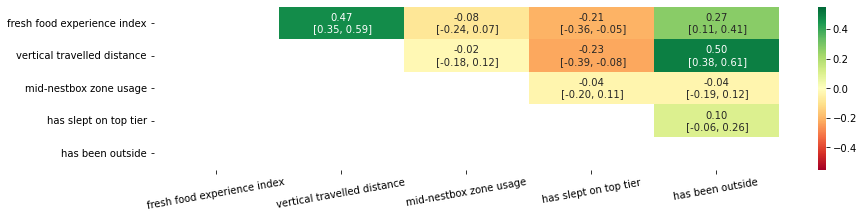

In [29]:
#build the correlation matrix
CorrM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
labels_ = np.array([['                                '] * len(li_mvt)] * len(li_mvt))
for i in range(0,len(li_mvt)):
    CorrM[i][i] = np.nan
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        CorrM[i][j] = v
        CorrM[j][i] = np.nan
        t = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['text'].values[0] 
        t = t.replace(' [','\n [')
        labels_[i][j] = t
        labels_[j][i] = ''
print(CorrM)
#print(labels_)
plt.figure(figsize=(14,3)) #9, 6.5
sns.heatmap(CorrM, cmap='RdYlGn', annot=labels_, fmt = '', 
            xticklabels=[dico_mvt_name[i] for i in li_mvt], yticklabels=[dico_mvt_name[i] for i in li_mvt],
           vmin=-0.55, vmax=0.55)
plt.xticks(rotation=10)
#fmt = ''is required for string labels
plt.xlabel('');
plt.ylabel('');
plt.savefig(os.path.join(path_extracted_data,'BS_corr.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### eigenvector decomposition

In [7]:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
#chose behaviour we want in the pca and assocaite them to a name
li_mvt_pc = ['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'SleepingUppest', 'WentinWG']
#midcumZ4hMorning
Corr = np.zeros(shape=(len(li_mvt_pc), len(li_mvt_pc)))
for i in range(0,len(li_mvt_pc)):
    Corr[i][i] = 1
    for j in range(i+1,len(li_mvt_pc)):
        mvt1 = li_mvt_pc[i]
        mvt2 = li_mvt_pc[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        Corr[i][j] = v
        Corr[j][i] = v
print(Corr)
#eigen decomposition sorted by biggest eingenvalues
eigenValues, eigenVectors = eig(Corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
#in R would simply be: eigen(Corr). same result
print(li_mvt_pc)
print(eigenValues)
comp1 = list(eigenVectors[:,0])
comp2 = list(eigenVectors[:,1])
#unit length vector
print(np.sqrt(sum([i*i for i in comp1])))
print(eigenVectors)#first columns: pc1 (multiple 0,0 by limvt0, 1,0 by VTD,... ;  second: pc2
print('Explained var:')
li_exvar = [i/sum(eigenValues) for i in eigenValues]
print(sum(li_exvar))
li_exvar

[[ 1.          0.46607736 -0.2092789   0.26742055]
 [ 0.46607736  1.         -0.22954395  0.49687734]
 [-0.2092789  -0.22954395  1.          0.10175779]
 [ 0.26742055  0.49687734  0.10175779  1.        ]]
['scalefoodsameDurTimingr50final', 'scaleverticaltraveldistancefulllightperinsideh', 'SleepingUppest', 'WentinWG']
[1.87726781 1.1000841  0.62905116 0.39359693]
1.0
[[-0.54433334  0.16220583 -0.79337437 -0.21896936]
 [-0.63276934 -0.02673094  0.22425284  0.74067475]
 [ 0.23780474 -0.82601987 -0.4145204   0.29885268]
 [-0.49674248 -0.5391344   0.3852799  -0.5604823 ]]
Explained var:
1.0


[0.4693169528518232,
 0.2750210248576597,
 0.1572627893503771,
 0.09839923294014004]

### standard deviation of the loadings

In [8]:
#download all posterior samples to compute std dev of the PCs
df_allit = pd.read_csv(os.path.join(path_extracted_data,'BRMS_BS_pred_allvar_FINAL.csv'), sep=',')
print(df_allit.shape)  #(1250, 4044) ou (5000, 1011)
li_col = set([x for x in list(df_allit.columns) if 'cor_HenID__' in x]) #X*, where * is the number of chain
print(len(li_col))
display(li_col)
df_allit = df_allit[li_col].copy()
df_allit['run'] = df_allit.index
print(df_allit.shape)
display(df_allit.head(3))

(5000, 4045)
40


{'X1.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept',
 'X1.cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept',
 'X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept',
 'X2.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept',
 'X2.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept',


(5000, 41)


,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__SleepingUppest_Intercept,X4.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X1.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X4.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X2.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept,X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__SleepingUppest_Intercept,X4.cor_HenID__midcumZ4hMorning_Intercept__SleepingUppest_Intercept,X1.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X3.cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept,X2.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept,...,X2.cor_HenID__midcumZ4hMorning_Intercept__WentinWG_Intercept,X4.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,X1.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__WentinWG_Intercept,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__WentinWG_Intercept,X2.cor_HenID__scalefoodsameDurTimingr50final_Intercept__scaleverticaltraveldistancefulllightperinsideh_Intercept,X3.cor_HenID__scalefoodsameDurTimingr50final_Intercept__midcumZ4hMorning_Intercept,X4.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept,X2.cor_HenID__scaleverticaltraveldistancefulllightperinsideh_Intercept__midcumZ4hMorning_Intercept,X1.cor_HenID__SleepingUppest_Intercept__WentinWG_Intercept,run
0,-0.294399,-0.267593,-0.033284,-0.067894,0.520652,-0.183866,0.079455,0.012860,0.305193,-0.010539,...,0.024900,-0.316375,0.493831,0.235906,0.492553,-0.007498,-0.170298,-0.043429,0.207784,0
1,-0.120429,-0.161559,-0.099785,-0.051530,0.506669,-0.202466,0.074741,-0.050292,0.335855,0.110705,...,0.008102,-0.182857,0.521845,0.212064,0.428898,-0.097633,-0.141374,-0.097742,0.157137,1
2,-0.128833,-0.274957,-0.198528,-0.034900,0.519886,-0.196612,-0.017833,-0.173636,0.409891,0.153699,...,-0.091898,-0.134110,0.503366,0.271531,0.460145,-0.107470,-0.101741,-0.027590,0.134503,2


In [9]:
#find std deviation of pcs
li_comp1 = []
li_comp2 = []
li_chain = list(set([x.split('.')[0] for x in list(df_allit.columns) if 'X' in x]))
print(li_chain)
for run in tqdm.tqdm(df_allit['run'].unique()):
    for chain in li_chain:
        df_ = df_allit[df_allit['run']==run][[x for x in list(df_allit.columns) if 'X1' in x]].copy()
        M = np.zeros(shape=(len(li_mvt_pc), len(li_mvt_pc)))
        for i in range(0,len(li_mvt_pc)):
            M[i][i] = 1
            for j in range(i+1,len(li_mvt_pc)):
                mvt1 = li_mvt_pc[i]
                mvt2 = li_mvt_pc[j]
                vc = [x for x in list(df_.columns) if (mvt1 in x)&(mvt2 in x)]
                if len(vc)!=1:
                    print('ERROR')
                    print(vc)
                    sys.exit()
                v = df_[vc[0]].values[0]
                M[i][j] = v
                M[j][i] = v
        #print(M)
        #eigen decomposition sorted by biggest eingenvalues
        eigenValues, eigenVectors = eig(M)
        idx = eigenValues.argsort()[::-1]   
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        #extract first and second column
        li_comp1.append(eigenVectors[:,0])
        li_comp2.append(eigenVectors[:,1])
df_pc1loading = pd.DataFrame(li_comp1, columns=li_mvt_pc)
df_pc2loading = pd.DataFrame(li_comp2, columns=li_mvt_pc)
print(df_pc1loading.shape)
display(df_pc1loading.head(5))

#because Eigenvectors are not unique & multiplying by any constant, including -1 (which simply changes the sign), gives 
#another valid eigenvector, we have to account for this and ensure for isntace that one of the behaviour is always positive
#and if not,  multiplying all behaviours by -1
df_pc1loading['scaleverticaltraveldistancefulllightperinsideh'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['scaleverticaltraveldistancefulllightperinsideh'], #where condition is True (>0:keep)
                                 df_pc1loading['scaleverticaltraveldistancefulllightperinsideh']*-1)
#df_pc1loading['midcumZ4hMorning'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
#                                 df_pc1loading['midcumZ4hMorning'], #where condition is True
#                                 df_pc1loading['midcumZ4hMorning']*-1)
df_pc1loading['SleepingUppest'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['SleepingUppest'], #where condition is True
                                 df_pc1loading['SleepingUppest']*-1)
df_pc1loading['WentinWG'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['WentinWG'], #where condition is True
                                 df_pc1loading['WentinWG']*-1)
#Note: this behaviours have to be done after all others
df_pc1loading['scalefoodsameDurTimingr50final'] = np.where(df_pc1loading['scalefoodsameDurTimingr50final']>0, 
                                 df_pc1loading['scalefoodsameDurTimingr50final'], #where condition is True
                                 df_pc1loading['scalefoodsameDurTimingr50final']*-1)
df_pc1loading.head(5)

['X1', 'X3', 'X2', 'X4']


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:18<00:00, 268.01it/s]


(20000, 4)


,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,SleepingUppest,WentinWG
0,-0.520160,-0.658647,0.112399,-0.531963
1,-0.520160,-0.658647,0.112399,-0.531963
2,-0.520160,-0.658647,0.112399,-0.531963
3,-0.520160,-0.658647,0.112399,-0.531963
4,-0.544775,-0.636501,0.136555,-0.528621


,scalefoodsameDurTimingr50final,scaleverticaltraveldistancefulllightperinsideh,SleepingUppest,WentinWG
0,0.520160,0.658647,-0.112399,0.531963
1,0.520160,0.658647,-0.112399,0.531963
2,0.520160,0.658647,-0.112399,0.531963
3,0.520160,0.658647,-0.112399,0.531963
4,0.544775,0.636501,-0.136555,0.528621


### visualise results

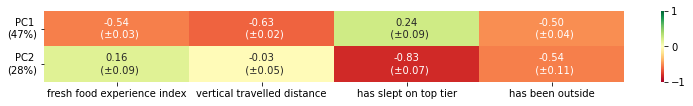

In [30]:
plt.figure(figsize=(13,1.3))
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
labels_ = np.array([['                   '] * len(li_mvt_pc)] * 2)
for i in range(0,len(li_mvt_pc)):
    labels_[0][i] = '%.2f' %round(comp1[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc1loading[li_mvt_pc[i]])),2) +')'
    labels_[1][i] = '%.2f' %round(comp2[i],2)+'\n  (±'+'%.2f' %round(np.std(abs(df_pc2loading[li_mvt_pc[i]])),2) +')'
sns.heatmap(np.array([[i for i in comp1], [i for i in comp2]]), annot=labels_, fmt = '', cmap='RdYlGn',vmin=-1, vmax=1,
            yticklabels=['PC1 \n('+str(round(li_exvar[0]*100))+'%)', 'PC2 \n('+str(round(li_exvar[1]*100))+'%)'], 
            xticklabels=[dico_mvt_name[i] for i in li_mvt_pc]);
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.savefig(os.path.join(path_extracted_data,'BS_PrincComp_loadings.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### visualise among behaviours correlation

In [11]:
li_mvt = ['scalefoodsameDurTimingr50final','scaleverticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning',
          'SleepingUppest', 'WentinWG']

,HenID_,value_mean_SleepingUppest,value_mean_WentinWG,value_mean_midcumZ4hMorning,value_mean_scalefoodsameDurTimingr50final,value_mean_scaleverticaltraveldistancefulllightperinsideh,lower_SleepingUppest,lower_WentinWG,lower_midcumZ4hMorning,lower_scalefoodsameDurTimingr50final,lower_scaleverticaltraveldistancefulllightperinsideh,upper_SleepingUppest,upper_WentinWG,upper_midcumZ4hMorning,upper_scalefoodsameDurTimingr50final,upper_scaleverticaltraveldistancefulllightperinsideh
0,hen_1,2.168087,2.482377,-0.138005,0.035182,-0.238263,-0.701850,0.446157,-0.231612,-0.430900,-0.653349,5.433254,4.674269,-0.045641,0.479239,0.139143
1,hen_10,-4.072455,-1.155278,-0.140978,-0.518432,-0.556875,-5.840210,-2.284900,-0.221297,-0.870103,-0.932892,-2.491253,-0.061911,-0.066420,-0.161925,-0.156775
2,hen_101,-1.056717,1.482310,-0.043479,0.422137,0.449101,-2.144804,0.186286,-0.115040,0.080748,0.101407,0.040973,2.869173,0.027654,0.794990,0.798888


scalefoodsameDurTimingr50final
scaleverticaltraveldistancefulllightperinsideh
0.466077362818603
0.555801108308764
0.827020660081571
0.6935135653475288


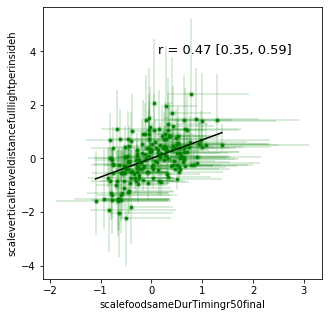

scalefoodsameDurTimingr50final
midcumZ4hMorning
-0.0824494332279047
0.555801108308764
0.138384903871554
-0.020528488916163233


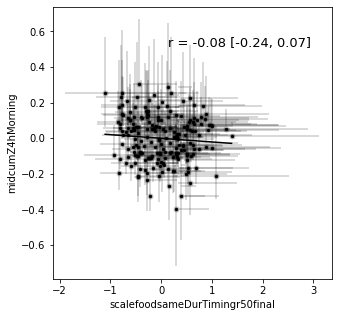

scalefoodsameDurTimingr50final
SleepingUppest
-0.209278898024454
0.555801108308764
2.26003706090946
-0.8509843872761843


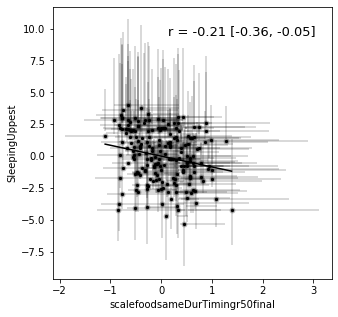

scalefoodsameDurTimingr50final
WentinWG
0.267420547333166
0.555801108308764
2.10867478439155
1.014576899109689


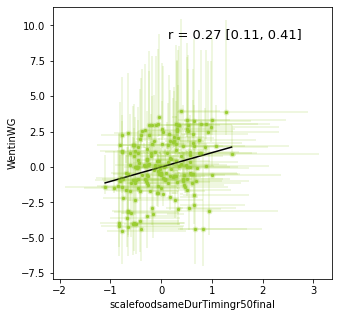

scaleverticaltraveldistancefulllightperinsideh
midcumZ4hMorning
-0.0224860363355574
0.827020660081571
0.138384903871554
-0.003762575866534536


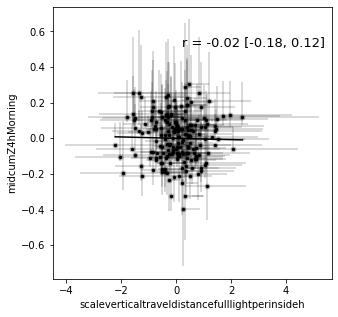

scaleverticaltraveldistancefulllightperinsideh
SleepingUppest
-0.22954395077251
0.827020660081571
2.26003706090946
-0.6272852189717739


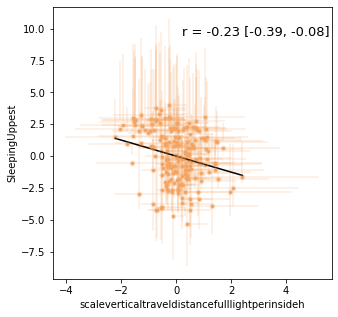

scaleverticaltraveldistancefulllightperinsideh
WentinWG
0.496877344568195
0.827020660081571
2.10867478439155
1.2669003061217867


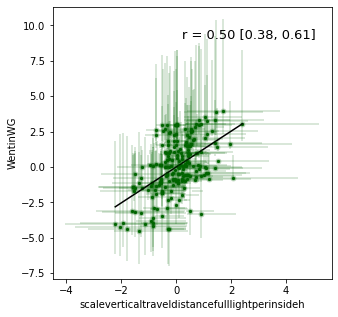

midcumZ4hMorning
SleepingUppest
-0.0372004604370543
0.138384903871554
2.26003706090946
-0.607540395798338


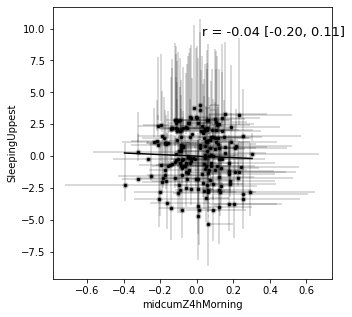

midcumZ4hMorning
WentinWG
-0.0380971345644939
0.138384903871554
2.10867478439155
-0.5805146715156506


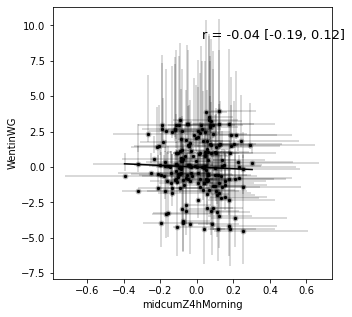

SleepingUppest
WentinWG
0.101757786606917
2.26003706090946
2.10867478439155
0.09494272569457575


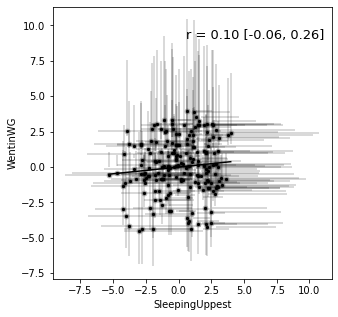

In [26]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        #choose color:
        li_ = [mvtx, mvty]
        if ('scalefoodsameDurTimingr50final' in li_) & ('scaleverticaltraveldistancefulllightperinsideh' in li_):
            color_ = 'green'
        elif ('scalefoodsameDurTimingr50final' in li_) & ('WentinWG' in li_):
            color_ = 'yellowgreen' #lightsalmon
        elif ('scaleverticaltraveldistancefulllightperinsideh' in li_) & ('SleepingUppest' in li_):
            color_ = 'sandybrown'
        elif ('scaleverticaltraveldistancefulllightperinsideh' in li_) & ('WentinWG' in li_):
            color_ = 'darkgreen'
        else:
            color_ = 'black'
        plt.figure(figsize=(5,5))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=color_, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color=color_, alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+"%.2f" % round(cor_mvtx_mvty,2)+' ['+"%.2f" % round(cor_mvtx_mvty_lower,2)+', '+"%.2f" % round(cor_mvtx_mvty_upper,2)+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.08, max(df_plt['upper_'+mvty].tolist())*1.4, text_, fontsize=13)
        #plt.set_xlim([x_min, x_max])   
        plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

# Repeatability

In [13]:
#search for the repeatability csv files, download each file and concatenate them
li_df = []
for path_ in glob.glob(os.path.join(path_extracted_data,'R_estimates_*.csv')):
    print('--------------------- files %s'%path_.split('\\')[-1])
    df_ = pd.read_csv(path_, sep=',', index_col=0)
    print(df_.shape) 
    display(df_.head(3))
    li_df.append(df_)
print('------------------------- ALL TOGETHER:')
df_R = pd.concat(li_df)  
df_R['VI_LL'] = df_R['li_VI'].map(lambda x: float(x.split(', ')[0].split('[')[1]))
df_R['VI_UL'] = df_R['li_VI'].map(lambda x: float(x.split(', ')[1].strip(']')))
df_R['VE_LL'] = df_R['li_VE'].map(lambda x: float(x.split(', ')[0].split('[')[1]))
df_R['VE_UL'] = df_R['li_VE'].map(lambda x: float(x.split(', ')[1].strip(']')))
df_R['VI'] = df_R['li_VI'].map(lambda x:float(x.split(' ')[0]))
df_R['VE'] = df_R['li_VE'].map(lambda x:float(x.split(' ')[0]))
display(df_R[['li_VI','li_VE','VI','VE','VI_LL','VI_UL','VE_LL','VE_UL']].head(3))
df_R['li_mvt_named'] = df_R['li_mvt'].map(lambda x: dico_mvt_name[x])
print(df_R.shape) 
display(df_R.head(3))

--------------------- files R_estimates_FOOD.csv
(6, 13)


,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
1,0.334778,0.281040,0.385040,194,3196,time,food_sameDurTiming_r50_final,0.207158,"0.0286 [0.0255, 0.0315]","0.0568 [0.0542, 0.0596]","0.2778 [0.2177, 0.3399]",NaN,NaN
2,0.362964,0.267997,0.461123,157,468,LP2,food_sameDurTiming_r50_final,0.207158,"0.0271 [0.0227, 0.0322]","0.0476 [0.042, 0.0546]","0.2678 [0.1965, 0.3445]",NaN,NaN
3,0.368903,0.272744,0.481675,153,444,LP10,food_sameDurTiming_r50_final,0.251194,"0.0333 [0.0274, 0.0402]","0.057 [0.0499, 0.0655]","0.2195 [0.1336, 0.3114]",NaN,NaN


--------------------- files R_estimates_MZ4.csv
(6, 13)


,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
1,0.516955,0.479049,0.561229,0.397739,0.479919,time,mid_cum_Z4_h_Morning,4.498069,"0.0227 [0.0202, 0.0256]","0.0212 [0.0193, 0.0229]","4.385 [4.3339, 4.4353]","0.0719 [0.0678, 0.0765]","0.0694 [0.0664, 0.0724]"
2,0.690166,0.597521,0.783263,0.267171,0.452913,LP2,mid_cum_Z4_h_Morning,4.365981,"0.0235 [0.0191, 0.0283]","0.0105 [0.0074, 0.0142]","4.2545 [4.171, 4.3366]","0.0742 [0.0672, 0.0819]","0.0496 [0.0418, 0.0576]"
3,0.584569,0.410891,0.751580,-0.051347,0.289342,LP10,mid_cum_Z4_h_Morning,5.329441,"0.023 [0.0156, 0.0322]","0.0163 [0.0098, 0.0244]","5.275 [5.1579, 5.4022]","0.0658 [0.0544, 0.0782]","0.0553 [0.0432, 0.068]"


--------------------- files R_estimates_SNU.csv
(6, 10)


,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE
1,0.479898,0.375183,0.540256,194,3196,time,Sleeping_Uppest,0.702441,"4.4144 [3.0213, 5.5413]","4.7843 [4.4535, 5.3423]"
2,0.555357,0.338020,0.696312,157,468,LP2,Sleeping_Uppest,0.685897,"5.7974 [2.4709, 11.2963]","4.6416 [4.3344, 5.3953]"
3,0.812636,0.652210,0.975295,153,444,LP10,Sleeping_Uppest,0.585586,"17.8725 [7.7162, 162.8591]","4.1207 [4.0209, 4.5154]"


--------------------- files R_estimates_VTD.csv
(6, 13)


,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,li_popintercept,li_CVI,li_CVE
1,0.659077,0.605899,0.704475,194,3196,time,vertical_travel_distance_fulllight_perinsideh,4.310258,"2.1752 [2.0159, 2.329]","1.1252 [1.0774, 1.1818]","4.2406 [3.9287, 4.5808]","0.7162 [0.6794, 0.7553]","0.5151 [0.4932, 0.5406]"
2,0.786395,0.735052,0.832179,157,468,LP2,vertical_travel_distance_fulllight_perinsideh,3.882524,"2.1004 [1.9076, 2.3104]","0.5705 [0.5, 0.6533]","4.1882 [3.7681, 4.5909]","0.7082 [0.6654, 0.7613]","0.3691 [0.3422, 0.4019]"
3,0.781175,0.727389,0.831525,153,444,LP10,vertical_travel_distance_fulllight_perinsideh,3.421423,"1.2722 [1.1551, 1.4065]","0.3564 [0.3157, 0.4079]","3.4221 [3.1134, 3.7371]","0.6097 [0.5743, 0.6571]","0.3227 [0.2998, 0.3513]"


--------------------- files R_estimates_WG.csv
(6, 10)


,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE
1,0.495627,0.407240,0.557160,194,3196,time,WentinWG,0.646746,"4.3011 [3.0493, 5.3606]","4.377 [4.147, 4.6539]"
2,0.599639,0.391043,0.685535,157,468,LP2,WentinWG,0.617521,"6.3413 [2.7791, 9.5586]","4.2339 [4.0812, 4.6416]"
3,0.593369,0.347224,0.769232,153,444,LP10,WentinWG,0.691441,"6.8396 [2.6394, 21.4634]","4.6871 [4.3748, 5.2706]"


------------------------- ALL TOGETHER:


,li_VI,li_VE,VI,VE,VI_LL,VI_UL,VE_LL,VE_UL
1,"0.0286 [0.0255, 0.0315]","0.0568 [0.0542, 0.0596]",0.0286,0.0568,0.0255,0.0315,0.0542,0.0596
2,"0.0271 [0.0227, 0.0322]","0.0476 [0.042, 0.0546]",0.0271,0.0476,0.0227,0.0322,0.0420,0.0546
3,"0.0333 [0.0274, 0.0402]","0.057 [0.0499, 0.0655]",0.0333,0.0570,0.0274,0.0402,0.0499,0.0655


(30, 22)


,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,...,li_CVE,li_CILbasic,li_CIUbasic,VI_LL,VI_UL,VE_LL,VE_UL,VI,VE,li_mvt_named
1,0.334778,0.281040,0.385040,194.0,3196.0,time,food_sameDurTiming_r50_final,0.207158,"0.0286 [0.0255, 0.0315]","0.0568 [0.0542, 0.0596]",...,NaN,NaN,NaN,0.0255,0.0315,0.0542,0.0596,0.0286,0.0568,fresh food experience index
2,0.362964,0.267997,0.461123,157.0,468.0,LP2,food_sameDurTiming_r50_final,0.207158,"0.0271 [0.0227, 0.0322]","0.0476 [0.042, 0.0546]",...,NaN,NaN,NaN,0.0227,0.0322,0.0420,0.0546,0.0271,0.0476,fresh food experience index
3,0.368903,0.272744,0.481675,153.0,444.0,LP10,food_sameDurTiming_r50_final,0.251194,"0.0333 [0.0274, 0.0402]","0.057 [0.0499, 0.0655]",...,NaN,NaN,NaN,0.0274,0.0402,0.0499,0.0655,0.0333,0.0570,fresh food experience index


In [14]:
#add nice text to output in the paper (i.e. with specific number of values after the comma, adding useless 0)
#add R and 95% interval as a text column
df_R['text'] = df_R.apply(lambda x: ("%.2f" % x['li_R'])+' ['+("%.2f" % x['li_CIL'])+', '+("%.2f" % x['li_CIU'])+']', 
                          axis=1)
df_R['li_VI'] = df_R.apply(lambda x: ("%.4f" % x['VI'])+' ['+("%.4f" % x['VI_LL'])+', '+("%.4f" % x['VI_UL'])+']', 
                          axis=1)
df_R['li_VE'] = df_R.apply(lambda x: ("%.4f" % x['VE'])+' ['+("%.4f" % x['VE_LL'])+', '+("%.4f" % x['VE_UL'])+']', 
                          axis=1)
df_R.head(3)

,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,...,li_CILbasic,li_CIUbasic,VI_LL,VI_UL,VE_LL,VE_UL,VI,VE,li_mvt_named,text
1,0.334778,0.281040,0.385040,194.0,3196.0,time,food_sameDurTiming_r50_final,0.207158,"0.0286 [0.0255, 0.0315]","0.0568 [0.0542, 0.0596]",...,NaN,NaN,0.0255,0.0315,0.0542,0.0596,0.0286,0.0568,fresh food experience index,"0.33 [0.28, 0.39]"
2,0.362964,0.267997,0.461123,157.0,468.0,LP2,food_sameDurTiming_r50_final,0.207158,"0.0271 [0.0227, 0.0322]","0.0476 [0.0420, 0.0546]",...,NaN,NaN,0.0227,0.0322,0.0420,0.0546,0.0271,0.0476,fresh food experience index,"0.36 [0.27, 0.46]"
3,0.368903,0.272744,0.481675,153.0,444.0,LP10,food_sameDurTiming_r50_final,0.251194,"0.0333 [0.0274, 0.0402]","0.0570 [0.0499, 0.0655]",...,NaN,NaN,0.0274,0.0402,0.0499,0.0655,0.0333,0.0570,fresh food experience index,"0.37 [0.27, 0.48]"


In [15]:
#create a matrix with each row corresponding to a movement behavior and each column a situation (over time, wihtin a context,
#across context). sort matrix by specific order
dico_bstype_order = {'AC':6, 'LP10':5, 'LP2':2, 'VD':4, 'cold':3, 'time':1}
dico_bstype_name = {'AC':'AC', 'LP10':'LLS', 'LP2':'ELS', 'VD':'VD', 'cold':'CET', 'time':'OT'}
df_R['order'] = df_R['li_BStype'].map(lambda x: dico_bstype_order[x])
df_R['li_BStype'] = df_R['li_BStype'].map(lambda x: dico_bstype_name[x])
df_R = df_R.sort_values(['order'])
#all R with CI
df_plt = df_R.pivot(index='li_mvt_named', columns='li_BStype', values='text').reset_index()
df_plt = df_plt[['li_mvt_named','OT','ELS','CET','VD','LLS','AC']]
df_plt

li_BStype,li_mvt_named,OT,ELS,CET,VD,LLS,AC
0,fresh food experience index,"0.33 [0.28, 0.39]","0.36 [0.27, 0.46]","0.42 [0.33, 0.52]","0.23 [0.13, 0.35]","0.37 [0.27, 0.48]","0.24 [0.16, 0.33]"
1,has been outside,"0.50 [0.41, 0.56]","0.60 [0.39, 0.69]","0.55 [0.33, 0.64]","0.30 [0.10, 0.38]","0.59 [0.35, 0.77]","0.25 [0.10, 0.31]"
2,has slept on top tier,"0.48 [0.38, 0.54]","0.56 [0.34, 0.70]","0.54 [0.31, 0.68]","0.50 [0.27, 0.72]","0.81 [0.65, 0.98]","0.41 [0.22, 0.51]"
3,mid-nestbox zone usage,"0.52 [0.48, 0.56]","0.69 [0.60, 0.78]","0.71 [0.63, 0.79]","0.57 [0.44, 0.70]","0.58 [0.41, 0.75]","0.47 [0.36, 0.59]"
4,vertical travelled distance,"0.66 [0.61, 0.70]","0.79 [0.74, 0.83]","0.73 [0.67, 0.79]","0.52 [0.43, 0.61]","0.78 [0.73, 0.83]","0.48 [0.40, 0.56]"


### visualise

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt_named,,,,,,
fresh food experience index,0.536664,0.68323,1.000000,0.000000,0.714117,0.062451
has been outside,0.705209,1.00000,0.860845,0.158155,0.982230,0.000000
has slept on top tier,0.173401,0.36086,0.312080,0.218727,1.000000,0.000000
mid-nestbox zone usage,0.197782,0.90352,1.000000,0.425928,0.473270,0.000000
vertical travelled distance,0.585696,1.00000,0.822346,0.148210,0.983016,0.000000


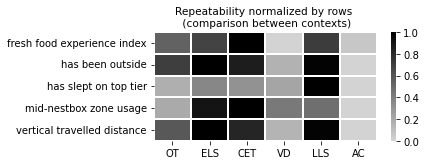

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt_named,,,,,,
fresh food experience index,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
has been outside,0.495989,0.558948,0.411340,0.208082,0.505858,0.013682
has slept on top tier,0.447486,0.454368,0.363214,0.780868,1.000000,0.707041
mid-nestbox zone usage,0.561756,0.772742,0.941689,1.000000,0.486025,0.954658
vertical travelled distance,1.000000,1.000000,1.000000,0.858475,0.929099,1.000000


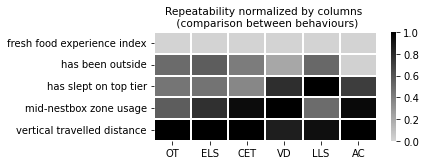

In [16]:
cmap_ = LinearSegmentedColormap.from_list('rg',["lightgrey", "black"], N=256) 
df_plt = df_R.pivot(index='li_mvt_named', columns='li_BStype', values='li_R')#.reset_index()
df_plt = df_plt[['OT','ELS','CET','VD','LLS','AC']]
#df_plt
li_col = list(df_R['li_BStype'].unique())

########################## normalize by row ##########################
plt.figure(figsize=(5,2))
df_plt_nr = df_plt.copy()
for mv in list(df_plt_nr.index): 
    df_plt_nr.loc[mv] = (df_plt_nr.loc[mv]-df_plt_nr.loc[mv].min())/(df_plt_nr.loc[mv].max()-df_plt_nr.loc[mv].min())
display(df_plt_nr)
sns.heatmap(df_plt_nr, cmap=cmap_, annot=False,
        xticklabels=list(df_plt_nr.columns), yticklabels=list(df_plt_nr.index),linewidths=1.8)
plt.xlabel('');
plt.ylabel('');
plt.title('Repeatability normalized by rows \n (comparison between contexts)', size=10.5)
plt.savefig(os.path.join(path_extracted_data,'R_normalizedrowwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

########################## normalize by columns ##########################
plt.figure(figsize=(5,2))
df_plt_nc = (df_plt[li_col]-df_plt[li_col].min())/(df_plt[li_col].max()-df_plt[li_col].min())
display(df_plt_nc)
sns.heatmap(df_plt_nc, cmap=cmap_, annot=False,
            xticklabels=list(df_plt_nc.columns), yticklabels=list(df_plt_nc.index),linewidths=1.8)
plt.xlabel('');
plt.ylabel('');
plt.title('Repeatability normalized by columns \n (comparison between behaviours)', size=10.5)
plt.savefig(os.path.join(path_extracted_data,'R_normalizedcolumnwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

### check #obs and #individual

In [17]:
#check metadata
#small check: (the gamma  : nestbox zone behaviour) family should have NAN everywhere, but is base dont he exact same dataset
display(df_R[['li_BStype','li_mvt','li_ngroup','li_nobs']].sort_values(['li_BStype','li_mvt'])) #CORRECT!
df_R[df_R['li_mvt']=='vertical_travel_distance_fulllight_perinsideh'][['li_BStype','li_ngroup','li_nobs']]

,li_BStype,li_mvt,li_ngroup,li_nobs
6,AC,Sleeping_Uppest,190.0,613.0
6,AC,WentinWG,190.0,613.0
6,AC,food_sameDurTiming_r50_final,190.0,613.0
6,AC,mid_cum_Z4_h_Morning,NaN,NaN
6,AC,vertical_travel_distance_fulllight_perinsideh,190.0,613.0
4,CET,Sleeping_Uppest,159.0,471.0
4,CET,WentinWG,159.0,471.0
4,CET,food_sameDurTiming_r50_final,159.0,471.0
4,CET,mid_cum_Z4_h_Morning,NaN,NaN
4,CET,vertical_travel_distance_fulllight_perinsideh,159.0,471.0


,li_BStype,li_ngroup,li_nobs
1,OT,194.0,3196.0
2,ELS,157.0,468.0
4,CET,159.0,471.0
5,VD,193.0,468.0
3,LLS,153.0,444.0
6,AC,190.0,613.0


In [18]:
#verification of R based on VI, VE
#in the binary the VE is the residual variance, which is define a s w(math.pi**2/3) innakawaga paper
#in the gamma the VE is define as trigamma(shape) innakawaga paper
df_R['verification'] = df_R.apply(lambda x: x['VI']/(x['VI']+x['VE']), axis=1)
df_R['isequal'] = df_R.apply(lambda x: x['li_R']-x['verification']<0.01, axis=1)
if df_R[~df_R['isequal']].shape[0]!=0:
    print('ERROR in your within / between individual variance!')
    display(df_R[~df_R['isequal']][['li_BStype','li_R','li_mvt','verification','VI','VE']].head(15))
    sys.exit()

In [19]:
dico_bstype_name = {'AC':'across context',
                    'OT':'over time',
                    'LLS':'late life stage',
                    'ELS':'early life stage',
                    'VD':'vaccination disturbance',
                    'CET':'cold external temperature'}
df_VIVEM = df_R.sort_values(['li_mvt'])[['li_BStype','li_mvt','li_VI','li_VE','li_mvtmean']].copy()
df_VIVEM['li_mvt'] = df_VIVEM['li_mvt'].apply(lambda x: dico_mvt_name[x])
df_VIVEM['li_BStype'] = df_VIVEM['li_BStype'].apply(lambda x: dico_bstype_name[x])
df_VIVEM.rename(columns={'li_mvt': 'movement behaviour', 'li_BStype':'situations',
                        'li_VI':'between-individual variance',
                        'li_VE':'within-individual variance',
                        'li_mvtmean':'trait meant'}, inplace=True)
df_VIVEM.to_csv(os.path.join(path_extracted_data,'BS_df_VI_VE_TraitMean.csv'), index=False, sep=',')
df_VIVEM

,situations,movement behaviour,between-individual variance,within-individual variance,trait meant
6,across context,has slept on top tier,"3.2504 [1.4561, 4.9528]","4.6755 [4.4202, 5.2933]",0.690049
1,over time,has slept on top tier,"4.4144 [3.0213, 5.5413]","4.7843 [4.4535, 5.3423]",0.702441
3,late life stage,has slept on top tier,"17.8725 [7.7162, 162.8591]","4.1207 [4.0209, 4.5154]",0.585586
2,early life stage,has slept on top tier,"5.7974 [2.4709, 11.2963]","4.6416 [4.3344, 5.3953]",0.685897
5,vaccination disturbance,has slept on top tier,"4.7942 [1.8252, 15.1296]","4.8300 [4.5294, 5.7079]",0.707265
4,cold external temperature,has slept on top tier,"5.4575 [2.3229, 12.7610]","4.7297 [4.4317, 5.4838]",0.696391
6,across context,has been outside,"1.3285 [0.4789, 1.8552]","4.0544 [4.0024, 4.1853]",0.557912
1,over time,has been outside,"4.3011 [3.0493, 5.3606]","4.3770 [4.1470, 4.6539]",0.646746
3,late life stage,has been outside,"6.8396 [2.6394, 21.4634]","4.6871 [4.3748, 5.2706]",0.691441
2,early life stage,has been outside,"6.3413 [2.7791, 9.5586]","4.2339 [4.0812, 4.6416]",0.617521


### Dataframe for metadata significance

In [20]:
dico_c_meannbr = {'OT':60, 
                  'ELS':9, 
                  'CET':9, 
                  'VD':85, 
                  'LLS':9, 
                  'AC':128}
df_R['meannbrdays'] = df_R['li_BStype'].map(lambda x: dico_c_meannbr[x])
#remove the outlier
df_R[['li_R','li_mvt','li_BStype','meannbrdays','VI','VE']].to_csv(os.path.join(path_extracted_data,'BS_lm_metadata.csv'), index=False, sep=',')
df_R.head(3)

,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt,li_mvtmean,li_VI,li_VE,...,VE_LL,VE_UL,VI,VE,li_mvt_named,text,order,verification,isequal,meannbrdays
1,0.334778,0.281040,0.385040,194.0,3196.0,OT,food_sameDurTiming_r50_final,0.207158,"0.0286 [0.0255, 0.0315]","0.0568 [0.0542, 0.0596]",...,0.0542,0.0596,0.0286,0.0568,fresh food experience index,"0.33 [0.28, 0.39]",1,0.334895,True,60
1,0.659077,0.605899,0.704475,194.0,3196.0,OT,vertical_travel_distance_fulllight_perinsideh,4.310258,"2.1752 [2.0159, 2.3290]","1.1252 [1.0774, 1.1818]",...,1.0774,1.1818,2.1752,1.1252,vertical travelled distance,"0.66 [0.61, 0.70]",1,0.659072,True,60
1,0.479898,0.375183,0.540256,194.0,3196.0,OT,Sleeping_Uppest,0.702441,"4.4144 [3.0213, 5.5413]","4.7843 [4.4535, 5.3423]",...,4.4535,5.3423,4.4144,4.7843,has slept on top tier,"0.48 [0.38, 0.54]",1,0.479894,True,60


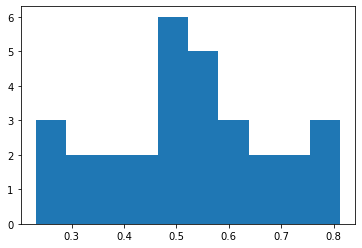

In [21]:
plt.hist(df_R['li_R']);

In [22]:
dico_mvt_name

{'scalefoodsameDurTimingr50final': 'fresh food experience index',
 'scaleverticaltraveldistancefulllightperinsideh': 'vertical travelled distance',
 'midcumZ4hMorning': 'mid-nestbox zone usage',
 'SleepingUppest': 'has slept on top tier',
 'WentinWG': 'has been outside',
 'food_sameDurTiming_r50_final': 'fresh food experience index',
 'Sleeping_Uppest': 'has slept on top tier',
 'vertical_travel_distance_fulllight_perinsideh': 'vertical travelled distance',
 'mid_cum_Z4_h_Morning': 'mid-nestbox zone usage'}

,li_mvt,li_BStype,meannbrdays,variable,value,li_mvt_named
0,food_sameDurTiming_r50_final,OT,60,between-individual \n variance,0.0286,fresh food experience \nindex
1,vertical_travel_distance_fulllight_perinsideh,OT,60,between-individual \n variance,2.1752,vertical travelled \ndistance
2,Sleeping_Uppest,OT,60,between-individual \n variance,4.4144,has slept on top tier


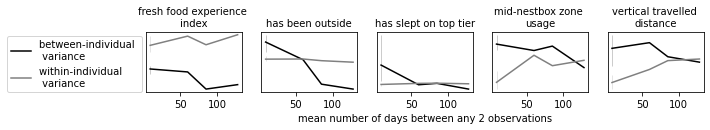

In [25]:
df_ = pd.melt(df_R, id_vars=['li_mvt','li_BStype','meannbrdays'], value_vars=['VI','VE'], value_name = 'value')
dico_V_named = {'VI':'between-individual \n variance', 'VE':'within-individual \n variance'}
df_['variable'] = df_['variable'].map(lambda x: dico_V_named[x])
dico_mvt_name2 = {'WentinWG': 'has been outside',
                 'food_sameDurTiming_r50_final': 'fresh food experience \nindex',
                 'Sleeping_Uppest': 'has slept on top tier',
                 'vertical_travel_distance_fulllight_perinsideh': 'vertical travelled \ndistance',
                 'mid_cum_Z4_h_Morning': 'mid-nestbox zone \nusage'}
df_['li_mvt_named'] = df_['li_mvt'].map(lambda x: dico_mvt_name2[x])
pal_ = {'between-individual \n variance':'black', 'within-individual \n variance':'grey'}
display(df_.head(3))
plt.figure(figsize=(10,1.1))
l=1
c=5
for i,(mvt, df_plt) in enumerate(df_.groupby(['li_mvt_named'])):
    plt.subplot(l,c,i+1)
    if i==0:
        sns.lineplot(x='meannbrdays',y='value', data=df_plt, hue='variable', palette=pal_, legend=True);
        plt.legend(bbox_to_anchor=(-0.04, 0), loc='lower right', borderaxespad=0)
    else:
        sns.lineplot(x='meannbrdays',y='value', data=df_plt, hue='variable', palette=pal_, legend=False);
    plt.ylabel('')
    if i==2:
        plt.xlabel('mean number of days between any 2 observations')
    else:
        plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.title(mvt, size=10)
    #plt.show();
plt.savefig(os.path.join(path_extracted_data,'Within_between_var.png'),dpi=300,format='png',bbox_inches='tight')